# **Resale flat prices based on registration date from Jan-2017 onwards**
Data from Jan 2017 to Oct 2025

Last updated: 06 Oct 2025, 02:09 SGT

HDB (Housing & Development Board)

Notes:

* The approximate floor area includes any recess area purchased, space adding item under HDB’s upgrading programmes, roof terrace, etc.

* The transactions exclude resale transactions that may not reflect the full market price such as resale between relatives and resale of part shares.

* Resale prices should be taken as indicative only as the resale prices agreed between buyers and sellers are dependent on many factors.

Housing & Development Board, 2025, "Resale flat prices based on registration date from Jan-2017 onwards", data.gov.sg. Accessed: October 6, 2025. [Online]. Available: https://data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view

## Data Wrangling

In [177]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [234]:
# Setting up the formatting parameters
pd.set_option('display.max_columns',500) # To display max columns
pd.set_option('display.max_row',15000) # To display max rows
pd.options.display.float_format = "{:,.2f}".format #format floating-point number

In [153]:
# Load the dataset
df = pd.read_csv('dataset\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217253 entries, 0 to 217252
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                217253 non-null  object 
 1   town                 217253 non-null  object 
 2   flat_type            217253 non-null  object 
 3   block                217253 non-null  object 
 4   street_name          217253 non-null  object 
 5   storey_range         217253 non-null  object 
 6   floor_area_sqm       217253 non-null  float64
 7   flat_model           217253 non-null  object 
 8   lease_commence_date  217253 non-null  int64  
 9   remaining_lease      217253 non-null  object 
 10  resale_price         217253 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.2+ MB


In [155]:
duplicate = df.duplicated().sum()
print(f"There are {duplicate} duplicate rows in the dataset")
print()
df = df.drop_duplicates().reset_index(drop=True)
print(f"All {duplicate} duplicate rows were removed from the dataset")

There are 306 duplicate rows in the dataset

All 306 duplicate rows were removed from the dataset


In [156]:
df.nunique()

month                   106
town                     26
flat_type                 7
block                  2743
street_name             576
storey_range             17
floor_area_sqm          186
flat_model               21
lease_commence_date      57
remaining_lease         692
resale_price           4486
dtype: int64

In [157]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [158]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [159]:
df['street_name'].unique()

array(['ANG MO KIO AVE 10', 'ANG MO KIO AVE 4', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 9',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 6', 'ANG MO KIO ST 52',
       'BEDOK NTH AVE 4', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'BEDOK STH AVE 1', 'BEDOK RESERVOIR RD', 'CHAI CHEE ST',
       'BEDOK NTH ST 3', 'BEDOK STH RD', 'CHAI CHEE AVE',
       'NEW UPP CHANGI RD', 'CHAI CHEE DR', 'BEDOK STH AVE 2',
       'BEDOK NTH AVE 3', 'BEDOK RESERVOIR VIEW', 'CHAI CHEE RD',
       'LENGKONG TIGA', 'BEDOK CTRL', 'JLN DAMAI', 'BEDOK NTH AVE 2',
       'BEDOK STH AVE 3', 'SIN MING RD', 'SIN MING AVE', 'BISHAN ST 12',
       'BISHAN ST 13', 'BISHAN ST 22', 'BISHAN ST 24', 'BISHAN ST 23',
       'BRIGHT HILL DR', 'SHUNFU RD', 'BT BATOK ST 34', 'BT BATOK ST 51',
       'BT BATOK ST 11', 'BT BATOK ST 52', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 6', 'BT BATOK CTRL',
       'BT BATOK WEST AVE 8', 'BT BATOK EAST AVE 4', 'BT BATOK ST 3

In [160]:
df['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [161]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

In [162]:
df['remaining_lease'].unique()

array(['61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
       '63 years 04 months', '63 years 06 months', '67 years 07 months',
       '61 years 07 months', '68 years 02 months', '68 years 03 months',
       '56 years', '67 years 09 months', '67 years 05 months',
       '63 years 07

In [163]:
df['lease_commence_date'].unique()

array([1979, 1978, 1980, 1981, 1976, 1977, 2011, 2012, 1996, 1988, 1985,
       1986, 1974, 1984, 1983, 1987, 1982, 2000, 2001, 2005, 1989, 2010,
       1972, 1993, 1973, 1992, 1990, 1998, 2004, 1997, 1971, 1975, 1970,
       1969, 2013, 2008, 1999, 2003, 2002, 1995, 2006, 1967, 1968, 2007,
       1991, 1966, 2009, 1994, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [168]:
df['lease_commence_date'].describe()[['min', 'max']]

min    1966.0
max    2022.0
Name: lease_commence_date, dtype: float64

## Feature Engineering

In [170]:
# Extract years and months using regex
df['lease_years'] = df['remaining_lease'].str.extract(r'(\d+)')[0].astype(int)
df['lease_months'] = df['remaining_lease'].str.extract(r'(\d+)\s*years\s*(\d+)\s*months')[1].fillna(0).astype(int)

# Calculate the total number of months
df['remaining_lease_months'] = df['lease_years'] * 12 + df['lease_months']

# Dropping the intermediate columns
df = df.drop(columns=['lease_years', 'lease_months', 'remaining_lease'])

# Check unique values
df['remaining_lease_months'].unique()

array([ 736,  727,  749,  744,  756,  738,  700,  716,  714,  720,  752,
        732,  730,  711,  737,  724,  723,  765,  742,  702,  712,  755,
        728, 1124, 1123, 1136,  940,  726,  750,  696,  848,  760,  762,
        811,  739,  818,  819,  672,  813,  809,  763,  795,  784,  833,
        719,  725,  830,  831,  826,  754,  772,  792,  996, 1055,  854,
       1108,  654,  942,  995,  904,  799,  798,  911,  820,  669,  823,
        815,  816,  828,  839,  894,  892,  834,  867,  806,  797,  832,
        803,  802,  960,  836,  801,  814,  810, 1040,  858,  855,  808,
       1043, 1042,  953,  790,  807,  959,  642,  686,  624,  699,  618,
        704,  674,  644,  776,  666, 1147,  660, 1144,  630,  688,  684,
        990,  812,  948, 1148, 1091, 1054,  992,  822,  974,  677,  785,
        849,  852, 1138,  963, 1007,  850,  972,  846, 1020,  977,  967,
        970, 1006, 1041,  957, 1018,  971,  851, 1012, 1005,  976,  955,
        975,  840,  845,  847,  675,  768,  825,  7

In [171]:
# Flat age feature
df['flat_age'] = 2025 - df['lease_commence_date']

# Drop lease_commence_date column
df = df.drop(columns=['lease_commence_date'])

# Check unique values
df['flat_age'].unique()

array([46, 47, 45, 44, 49, 48, 14, 13, 29, 37, 40, 39, 51, 41, 42, 38, 43,
       25, 24, 20, 36, 15, 53, 32, 52, 33, 35, 27, 21, 28, 54, 50, 55, 56,
       12, 17, 26, 22, 23, 30, 19, 58, 57, 18, 34, 59, 16, 31, 11, 10,  9,
        8,  7,  6,  5,  4,  3], dtype=int64)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216947 entries, 0 to 216946
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   month                   216947 non-null  object 
 1   town                    216947 non-null  object 
 2   flat_type               216947 non-null  object 
 3   block                   216947 non-null  object 
 4   street_name             216947 non-null  object 
 5   storey_range            216947 non-null  object 
 6   floor_area_sqm          216947 non-null  float64
 7   flat_model              216947 non-null  object 
 8   resale_price            216947 non-null  float64
 9   remaining_lease_months  216947 non-null  int32  
 10  flat_age                216947 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 17.4+ MB


### Outliners

In [215]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['floor_area_sqm', 'resale_price', 'remaining_lease_months', 'flat_age']
Categorical Features: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']


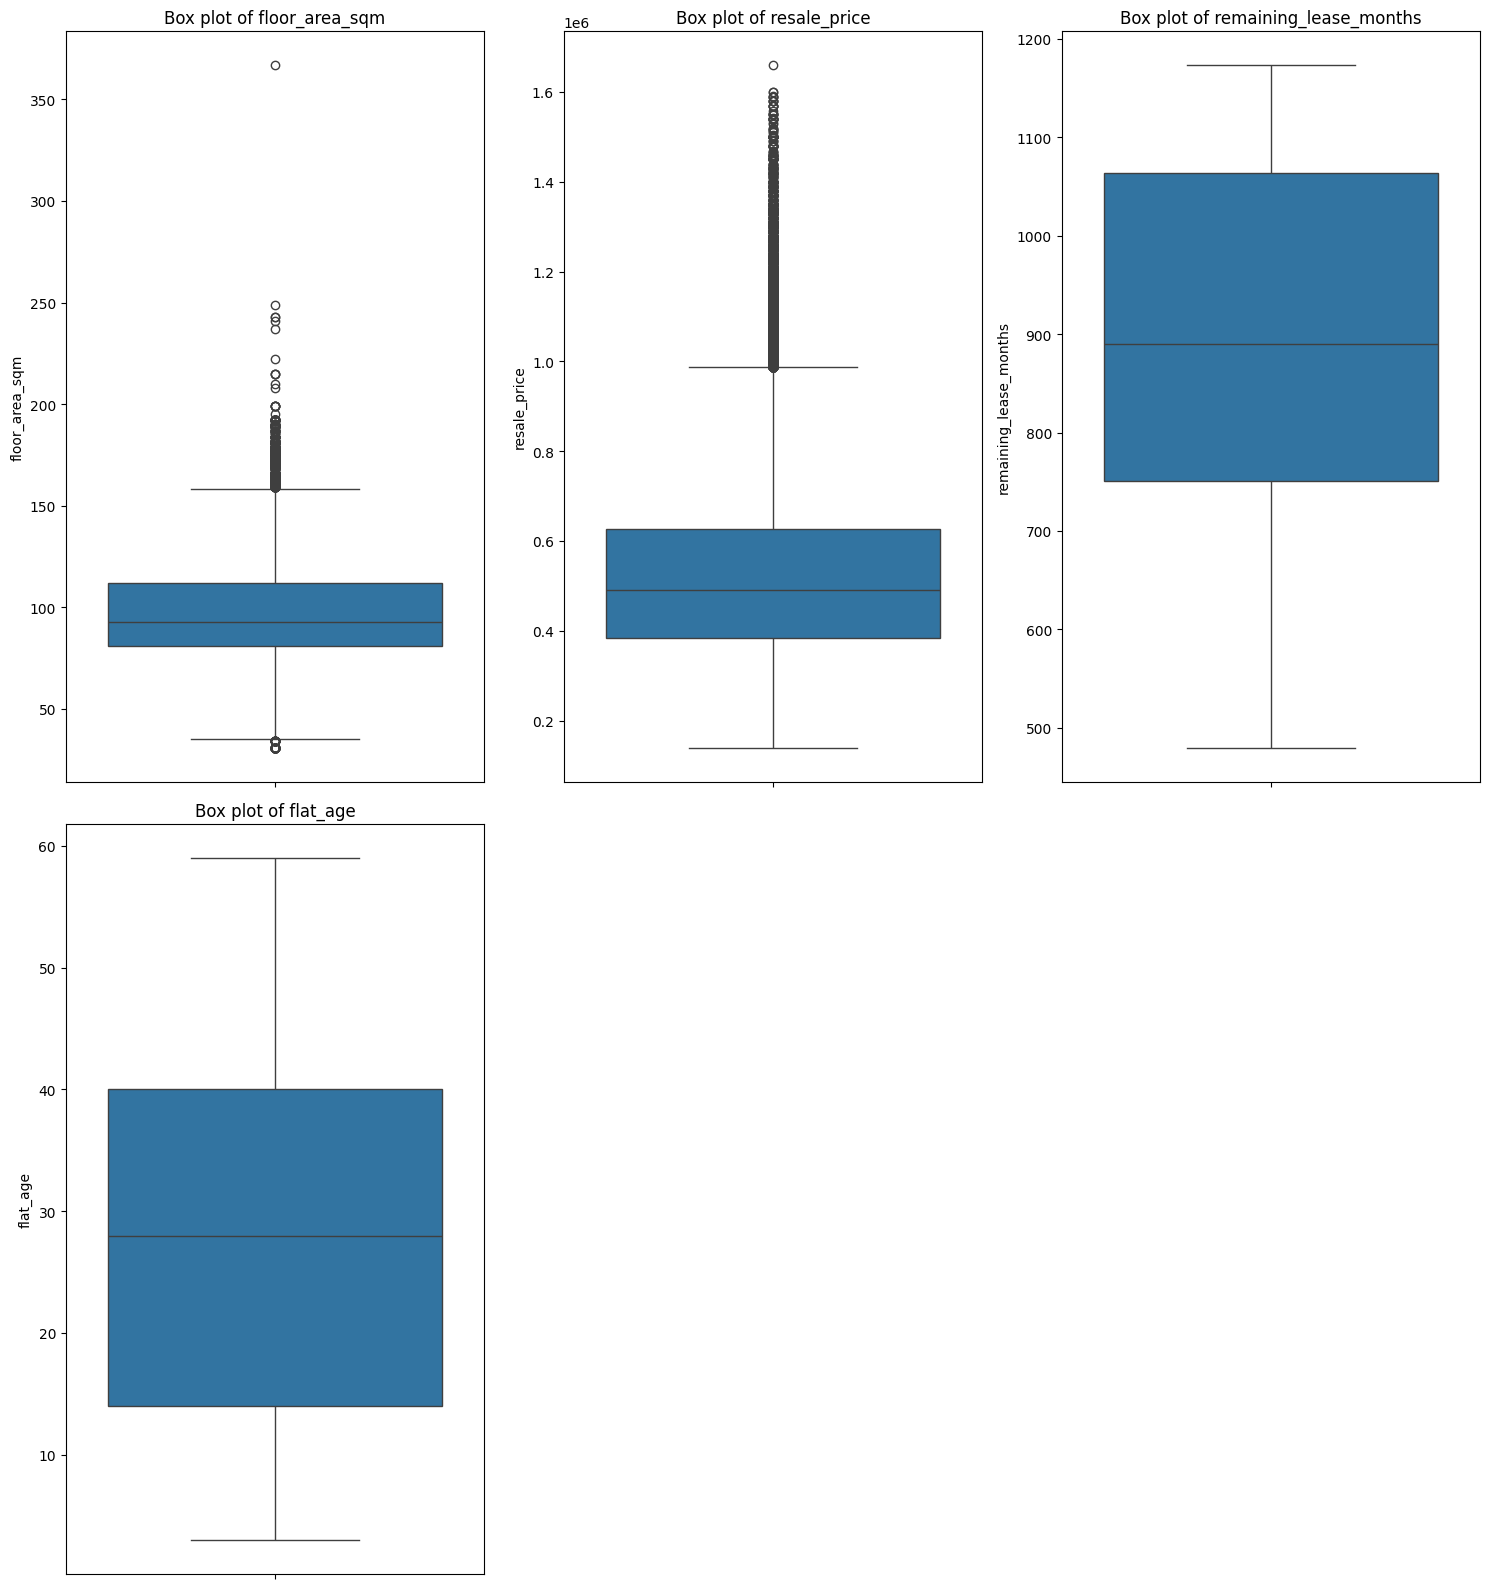

In [220]:
# function to create box plots for numerical features
def plot_boxplots(features):
    
    # Determine the number of rows and columns for subplots
    n_columns = len(features)
    
    # Calculate number of rows needed for 3 columns
    n_rows = (n_columns +2) // 3
    
    # Create subplots
    fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 8*n_rows))
    axs = axs.flatten()

    # Create box plots for each feature
    for i, var in enumerate(features):
        sns.boxplot(y=df[var], ax=axs[i])
        axs[i].set_title(f'Box plot of {var}')
        axs[i].set_ylabel(var)
    
    # Remove any unused subplots
    if n_columns < len(axs):
        for i in range(n_columns, len(axs)):
            fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

# Call the function to plot box plots for numerical features
plot_boxplots(numerical_features)

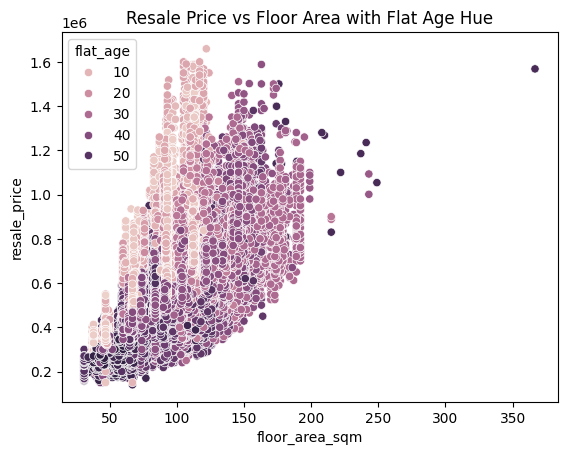

In [ ]:
# Visualizing the relationship between floor_area_sqm and resale_price
sns.scatterplot(x=df['floor_area_sqm'], y=df['resale_price'], hue=df['flat_age'])
plt.title('Resale Price vs Floor Area with Flat Age Hue')
plt.show()

In [222]:
# Setting Working Range for floor_area_sqm
# Setting a threshold for outliers
outlier_threshold = 200  # Example threshold for floor_area_sqm

# Removing outliers from the 'floor_area_sqm' column
df = df[df['floor_area_sqm'] <= outlier_threshold]

# Check the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df))

Number of rows after removing outliers: 216935


<Axes: ylabel='floor_area_sqm'>

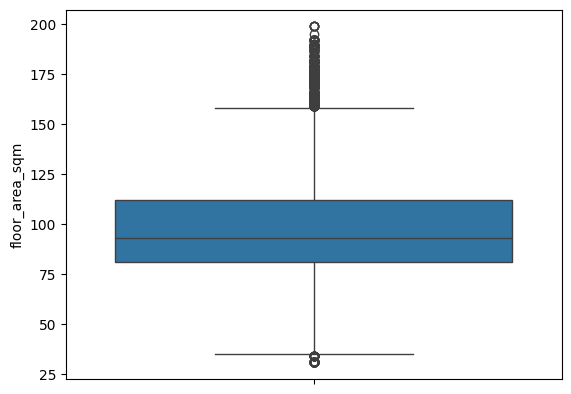

In [224]:
sns.boxplot(y=df['floor_area_sqm'])

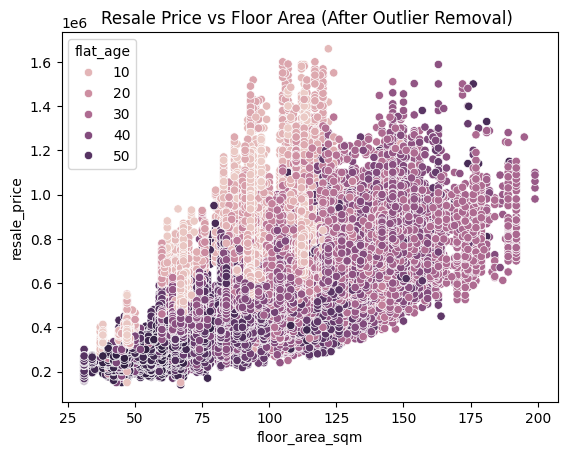

In [226]:
# Visualizing the relationship between floor_area_sqm and resale_price
sns.scatterplot(x=df['floor_area_sqm'], y=df['resale_price'], hue=df['flat_age'])
plt.title('Resale Price vs Floor Area (After Outlier Removal) ')
plt.show()

## Exploratory Data Analysis

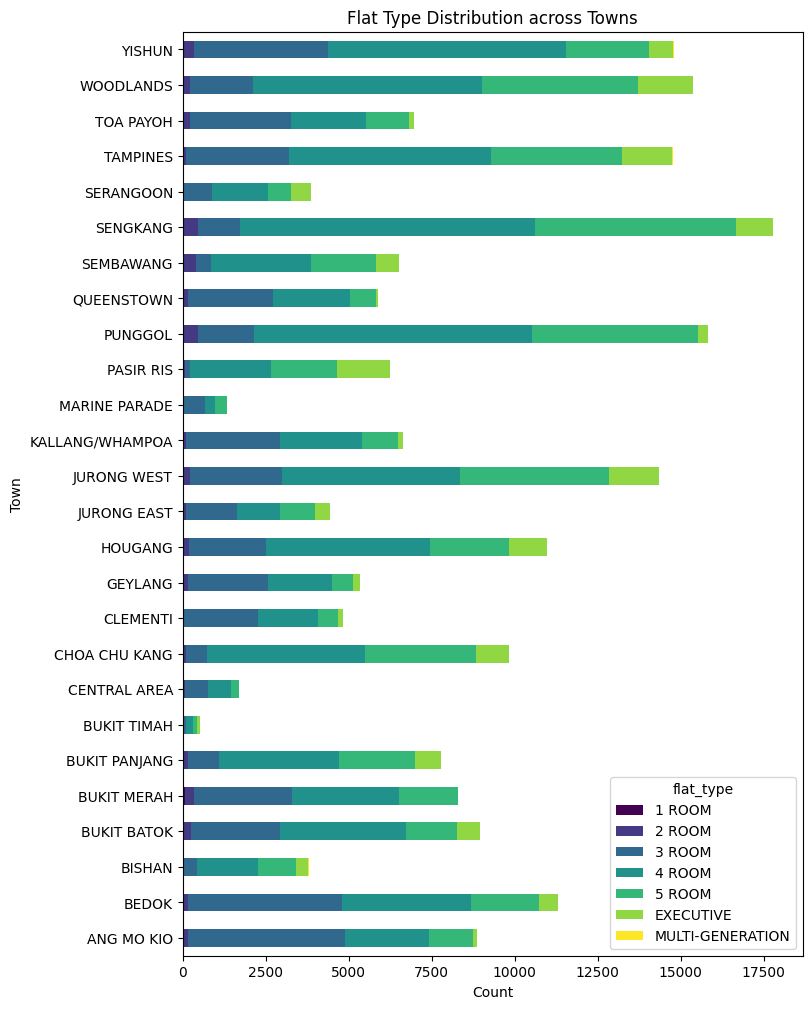

In [236]:
# Visualizing the distribution of flat types across different towns
pd.crosstab(index=df['town'], 
            columns=df['flat_type']) \
            .plot(kind='barh', stacked=True, 
                    figsize=(8,12), 
                    colormap='viridis', 
                    title='Flat Type Distribution across Towns')
plt.xlabel('Count')
plt.ylabel('Town')
plt.show()